In [3]:
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
import seaborn as sns

In [2]:
df=pd.read_csv('NYCR.csv')
df.head()

,CAMIS,DBA,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,VIOLATION CODE,CRITICAL FLAG,SCORE
0,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,Bakery,2/9/2015,Violations were cited in the following area(s).,06C,Critical,6.0
1,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,Bakery,3/3/2014,Violations were cited in the following area(s).,10F,Not Critical,2.0
2,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,Bakery,10/10/2013,No violations were recorded at the time of thi...,NaN,Not Applicable,NaN
3,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,Bakery,9/11/2013,Violations were cited in the following area(s).,04L,Critical,6.0
4,30075445,MORRIS PARK BAKE SHOP,BRONX,1007,MORRIS PARK AVE,10462,Bakery,9/11/2013,Violations were cited in the following area(s).,04N,Critical,6.0


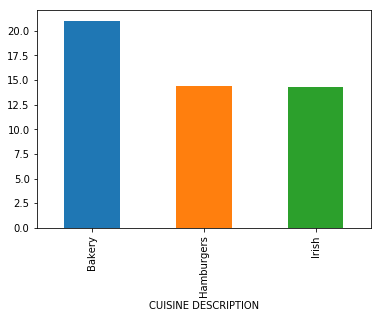

In [4]:
%matplotlib inline
sr=df.groupby('CUISINE DESCRIPTION')['SCORE'].mean()
sr.plot(kind='bar')

In [5]:
df['INSPECTION DATE']=pd.to_datetime(df['INSPECTION DATE'])
sr=df.groupby(df['INSPECTION DATE'].dt.year)['SCORE'].mean()
print(sr)

INSPECTION DATE
2011    18.428571
2012    17.416667
2013    18.733333
2014    13.538462
2015     6.000000
Name: SCORE, dtype: float64


In [6]:
df.groupby(['CUISINE DESCRIPTION','VIOLATION CODE'])['SCORE'].sum()

CUISINE DESCRIPTION  VIOLATION CODE
Bakery               02G               35.0
                     04C               32.0
                     04L               63.0
                     04N                6.0
                     06A               32.0
                     06C               63.0
                     08A               57.0
                     10F               69.0
                     16B                0.0
Hamburgers           02G               23.0
                     04H               28.0
                     04J               23.0
                     06A               39.0
                     06C                8.0
                     06D               25.0
                     06E               13.0
                     08B               12.0
                     10B               13.0
                     10E               12.0
                     10F               48.0
Irish                02G               11.0
                     04H               2

In [7]:
df.groupby(['ZIPCODE','CRITICAL FLAG'])['SCORE'].size()

ZIPCODE  CRITICAL FLAG 
10019    Critical           6
         Not Critical       8
10462    Critical          11
         Not Applicable     3
         Not Critical       8
11225    Critical          10
         Not Critical       7
Name: SCORE, dtype: int64

In [8]:
df2=pd.read_csv('Airbnb.csv')
df2.head()

,listing_id,host_id,host_url,host_name,host_since,host_location,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,31303940,https://www.airbnb.com/users/show/31303940,Virginia,4/15/2015,"Boston, Massachusetts, United States",NaN,NaN,f,Roslindale,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,2572247,https://www.airbnb.com/users/show/2572247,Andrea,6/7/2012,"Boston, Massachusetts, United States",100%,100%,f,Roslindale,...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,16701,https://www.airbnb.com/users/show/16701,Phil,5/11/2009,"Boston, Massachusetts, United States",100%,88%,t,Roslindale,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,6031442,https://www.airbnb.com/users/show/6031442,Meghna,4/21/2013,"Boston, Massachusetts, United States",100%,50%,f,NaN,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,15396970,https://www.airbnb.com/users/show/15396970,Linda,5/11/2014,"Boston, Massachusetts, United States",100%,100%,t,Roslindale,...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [9]:
df2['price']=df2['price'].replace('[\$,]', '', regex=True).astype(float)
df2['host_response_rate']=df2['host_response_rate'].replace('[\%,]', '', regex=True).astype(float)
df2['cleaning_fee']=df2['cleaning_fee'].replace('[\$,]', '', regex=True).astype(float)

In [10]:
s=df2.groupby(['bedrooms','cancellation_policy'])['price'].mean()
print(s)

bedrooms  cancellation_policy
0         flexible               110.000000
          moderate               128.333333
          strict                 104.000000
1         flexible                78.531250
          moderate                84.300000
          strict                  91.111111
2         flexible               140.000000
          moderate               194.846154
          strict                 183.583333
3         flexible               339.000000
          moderate               233.000000
          strict                 215.000000
4         flexible               267.000000
          moderate               169.500000
          strict                 305.333333
5         strict                 250.000000
Name: price, dtype: float64
